In [39]:
import pandas as pd
df=pd.read_csv('lungcancer.csv')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [2]:
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 2.8+ KB


In [4]:
df.describe()

,Age,Smokes,AreaQ,Alkhol,Result
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,42.627119,15.067797,5.203390,3.237288,0.474576
std,16.235230,7.984607,2.461984,2.380517,0.503640
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,10.000000,3.000000,1.000000,0.000000
50%,39.000000,15.000000,5.000000,3.000000,0.000000
75%,55.000000,20.000000,7.500000,5.000000,1.000000
max,77.000000,34.000000,10.000000,8.000000,1.000000


In [5]:
df.groupby('Result')['Smokes'].count()

Result
0    31
1    28
Name: Smokes, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Smokes'>

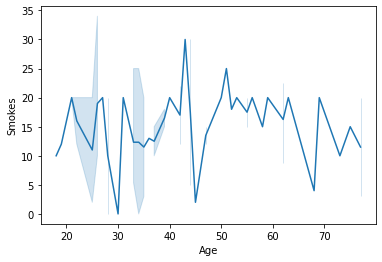

In [9]:
sns.lineplot(x='Age', y='Smokes', data=df)

<AxesSubplot:xlabel='Age', ylabel='AreaQ'>

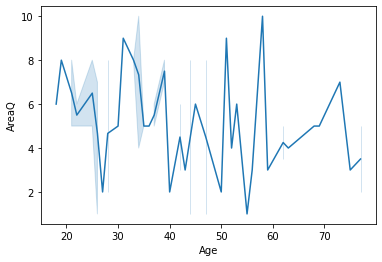

In [10]:
sns.lineplot(x='Age', y='AreaQ', data=df)

<AxesSubplot:xlabel='Age', ylabel='Alkhol'>

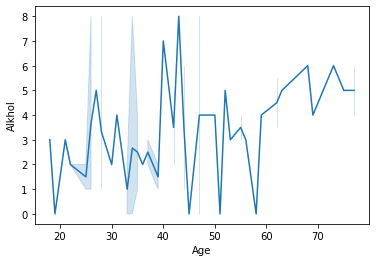

In [11]:
sns.lineplot(x='Age', y='Alkhol', data=df)

<AxesSubplot:xlabel='Age'>

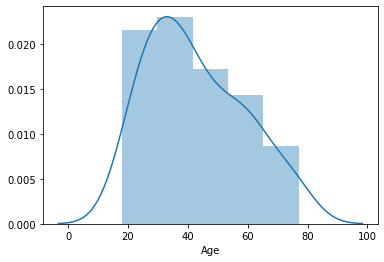

In [14]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Smokes'>

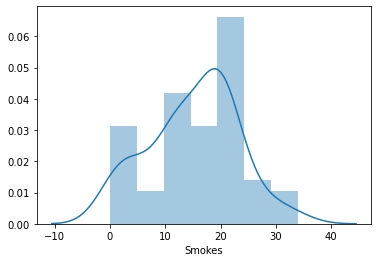

In [15]:
sns.distplot(df['Smokes'])

<AxesSubplot:xlabel='AreaQ'>

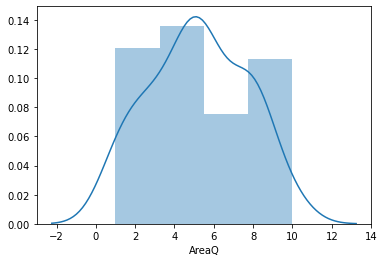

In [16]:
sns.distplot(df['AreaQ'])

<AxesSubplot:xlabel='Alkhol'>

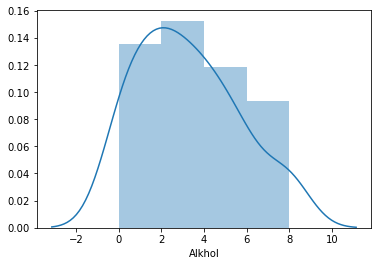

In [17]:
sns.distplot(df['Alkhol'])

<AxesSubplot:xlabel='Result', ylabel='count'>

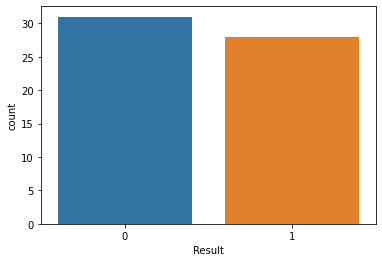

In [21]:
sns.countplot(df['Result'])

In [24]:
y=df['Result']
X=df.drop(['Name','Surname','Result'],1)

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [34]:
lr=LogisticRegression()

In [35]:
lr.fit(X_train,y_train)

LogisticRegression()

In [36]:
lr.predict(X_test)

array([0, 0, 0, 1, 0, 0], dtype=int64)

In [37]:
y_test

0     1
5     0
34    0
13    1
45    0
53    0
Name: Result, dtype: int64

In [38]:
lr.score(X_test,y_test)

0.8333333333333334

In [54]:
from sklearn.model_selection import cross_val_score
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
sv=SVC()
models = [dtc,sv,rfc]
#models.append(('LR', LogisticRegression()))


#models.append(('CART', DecisionTreeClassifier()))

#models.append(('SVM', SVC()))
results=[]

for names,model in enumerate(models):
    cv_results=cross_val_score(model,X,y,cv=5)
    results.append(cv_results)
    
    print('score :',enumerate(models), cv_results.mean())

score : <enumerate object at 0x156CB868> 0.9318181818181819
score : <enumerate object at 0x156D4EE8> 0.8984848484848484
score : <enumerate object at 0x156CB528> 0.9651515151515151
